# Initial Package Imports and Data (Boston Airbnb)

In [348]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt




In [156]:
#Reading in Calendar dataset
cal_dat = pd.read_csv('calendar.csv')

#viewing first few rows
cal_dat.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [120]:
#Reading in Listings dataset
list_dat = pd.read_csv('listings.csv')

#renaming id to be listing id for merging data later
list_dat = list_dat.rename(columns = {'id': 'listing_id'})

#viewing first few rows
list_dat.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


# Getting to know the datasets

In [122]:
cal_dat.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [124]:
cal_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [130]:
list_dat.describe()

,listing_id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [132]:
list_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

# Cleaning the data

In [134]:
#the rental prices are listed in currency format, but having them as a float means I'll be able to use them better in analyses
#since there are multiple price columns, I'd like to create a function that I can call to change them

def clean_prices(x):
    """
        Function for converting currency strings into floats
    """
    if isinstance(x, str):
        return(x.replace('$','').replace(',',''))
    return

In [296]:
#Changing any currency fields to floats across both Listings and Calendar datasets
list_dat['price'] = list_dat['price'].apply(clean_prices).astype('float')
list_dat['weekly_price'] = list_dat['weekly_price'].apply(clean_prices).astype('float')
list_dat['monthly_price'] = list_dat['monthly_price'].apply(clean_prices).astype('float')
list_dat['security_deposit'] = list_dat['security_deposit'].apply(clean_prices).astype('float')
list_dat['cleaning_fee'] = list_dat['cleaning_fee'].apply(clean_prices).astype('float')
cal_dat['price'] = cal_dat['price'].apply(clean_prices).astype('float')

In [158]:
#I'd also like to look at this data by day of week and month, so I'd like to extrapolate the existing date fields 
cal_dat['date'] = pd.to_datetime(cal_dat['date'])
cal_dat['day_of_week'] = cal_dat['date'].dt.day_name()
cal_dat['month'] = cal_dat['date'].dt.month_name()

# Exploring the data

In [200]:
#For my analysis, I would like to look at prices in relation to fields such as neighborhood and number of bedrooms to see what kind of properties I should consider investing in
#To do this, I'd like to remove any null values for my subset of data

list2_dat = list_dat[['listing_id','price','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds','review_scores_rating']]
list2_dat = list2_dat.dropna()
list2_dat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1115 entries, 1 to 3583
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              1115 non-null   int64  
 1   price                   1115 non-null   float64
 2   security_deposit        1115 non-null   float64
 3   neighbourhood_cleansed  1115 non-null   object 
 4   property_type           1115 non-null   object 
 5   room_type               1115 non-null   object 
 6   accommodates            1115 non-null   int64  
 7   bathrooms               1115 non-null   float64
 8   bedrooms                1115 non-null   float64
 9   beds                    1115 non-null   float64
 10  review_scores_rating    1115 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 104.5+ KB


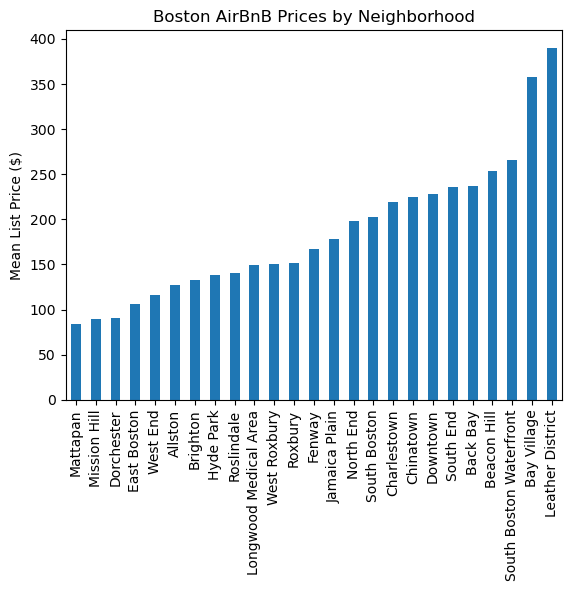

In [400]:
#I first want to know where in the city I should be looking at properties based on avg neighborhood list prices
#Calculate the average price based on neighborhood, sort to easily identify top neighborhoods
nbrhd = list2_dat.groupby(list2_dat['neighbourhood_cleansed'])['price'].mean().sort_values()
#plot for visual representation
nbrhd.plot(kind ='bar')
plt.title('Boston AirBnB Prices by Neighborhood')
plt.xlabel('')
plt.ylabel('Mean List Price ($)')



In [402]:
#convert series to dataframe for easy table identifying average prices and count so there's some context to the numbers
nbrhd_prices = nbrhd.to_frame()
#pull the count of listings in each neighborhood, so I'm not looking at a small sample
nbrhd_cnt = list2_dat['neighbourhood_cleansed'].value_counts()
#merge two dataframes to view in one table
nbrhd_df = pd.merge(nbrhd_prices, nbrhd_cnt, how = 'left', on='neighbourhood_cleansed')
#format list prices for visual currency, rename columns
nbrhd_df = nbrhd_df.rename(columns={'price':'Avg List Price','count':'# of Listings'})
nbrhd_df.index.name = 'Neighborhood'
nbrhd_df = nbrhd_df.style.format({'Avg List Price': "${:,.2f}"})

nbrhd_df



,Avg List Price,# of Listings
Neighborhood,,
Mattapan,$84.43,7
Mission Hill,$89.00,17
Dorchester,$90.55,127
East Boston,$106.45,44
West End,$116.25,4
Allston,$127.40,63
Brighton,$132.52,44
Hyde Park,$137.78,9
Roslindale,$140.69,16


Text(0.5, 1.0, 'Price Correlations for Boston AirBnBs')

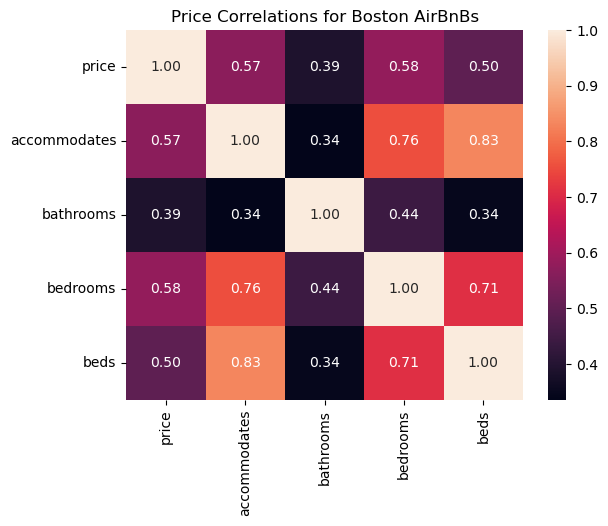

In [410]:
#I'd like to know what house features I should consider when purchasing a property
#lets look at a heat map of a correlation matrix looking at some of the numeric property features
list2_corr = list2_dat[['price','accommodates','bathrooms','bedrooms','beds']]
sns.heatmap(list2_corr.corr(),annot=True,fmt=".2f")

plt.title('Price Correlations for Boston AirBnBs')

<Axes: xlabel='bedrooms', ylabel='price'>

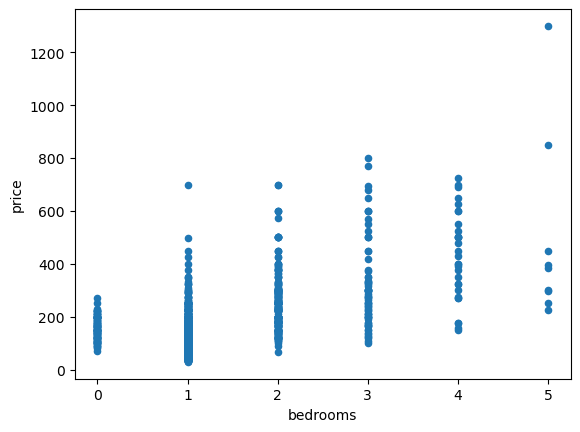

In [228]:
list2_corr.plot.scatter(x='bedrooms',y='price')

In [272]:
list2_dat['neighbourhood_cleansed'].describe()
list2_dat.nunique


listing_id                1115
price                      221
security_deposit            50
neighbourhood_cleansed      25
property_type                9
room_type                    3
accommodates                14
bathrooms                   11
bedrooms                     6
beds                        11
review_scores_rating        41
dtype: int64

Text(0, 0.5, 'Mean List Price ($)')

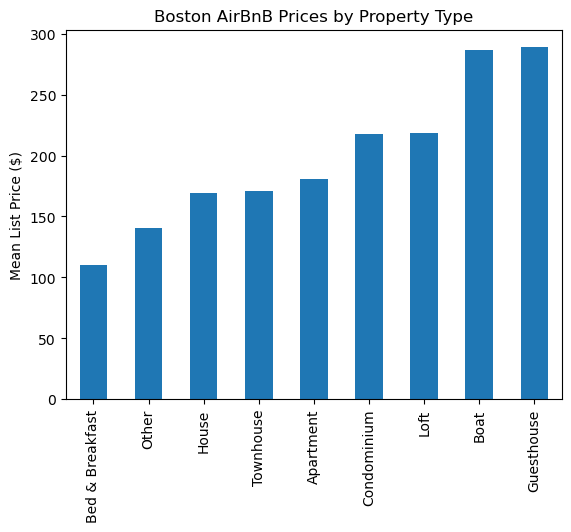

In [412]:
#I'm curious about what kinds of properties I should be looking at
propty = list2_dat.groupby(list2_dat['property_type'])['price'].mean().sort_values()
propty.plot(kind ='bar')
plt.title('Boston AirBnB Prices by Property Type')
plt.xlabel('')
plt.ylabel('Mean List Price ($)')


In [438]:
#convert series to dataframe for easy table identifying average prices and count so there's some context to the numbers
propty_prices = propty.to_frame()
#pull the count of listings for each property type, so I'm not looking at a small sample
propty_cnt = list2_dat['property_type'].value_counts()
#merge two dataframes to view in one table
propty_df = pd.merge(propty_prices, propty_cnt, how = 'left', on='property_type')
#format list prices for visual currency, rename columns
propty_df = propty_df.rename(columns={'price':'Avg List Price','count':'# of Listings'})
propty_df.index.name = 'Neighborhood'
propty_df = propty_df.style.format({'Avg List Price': "${:,.2f}"})

propty_df


,Avg List Price,# of Listings
Neighborhood,,
Bed & Breakfast,$110.40,5
Other,$140.33,6
House,$169.62,186
Townhouse,$170.95,22
Apartment,$181.16,779
Condominium,$218.09,99
Loft,$218.27,15
Boat,$287.00,2
Guesthouse,$289.00,1


<Axes: xlabel='property_type'>

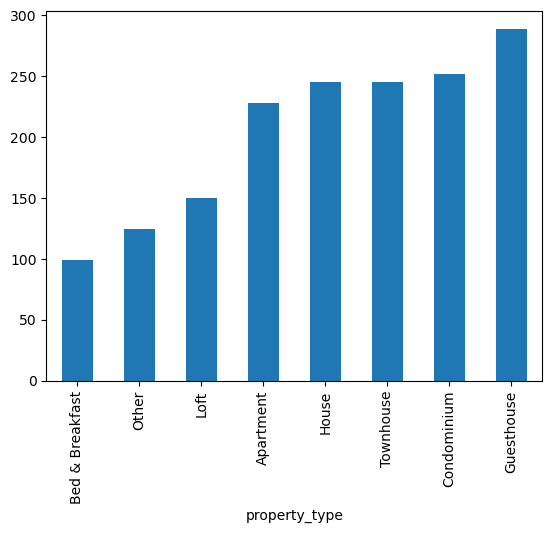

In [442]:
#What if I just wanted to look at 
nbhd_dat = list2_dat[list2_dat['neighbourhood_cleansed'].isin(['Beacon Hill','South Boston','Waterfront','Bay Village','Leather District'])]
propty2 = nbhd_dat.groupby(nbhd_dat['property_type'])['price'].mean().sort_values()
propty2.plot(kind ='bar')

In [464]:
#convert series to dataframe for easy table identifying average prices and count so there's some context to the numbers
propty2_prices = propty2.to_frame()
#pull the count of listings for each property type, so I'm not looking at a small sample
propty2_cnt = nbhd_dat['property_type'].value_counts()
#merge two dataframes to view in one table
propty2_df = pd.merge(propty2_prices, propty2_cnt, how = 'left', on='property_type')
#format list prices for visual currency, rename columns
propty2_df = propty2_df.rename(columns={'price':'Avg List Price','count':'# of Listings'})
propty2_df.index.name = 'Neighborhood'
propty2_df = propty2_df.style.format({'Avg List Price': "${:,.2f}"})

propty2_df

,Avg List Price,# of Listings
Neighborhood,,
Bed & Breakfast,$99.00,1
Other,$124.40,5
Loft,$150.00,1
Apartment,$227.56,105
House,$245.29,28
Townhouse,$245.33,6
Condominium,$252.04,25
Guesthouse,$289.00,1


In [470]:
#resetting my data to cross compare with calendar listing price data specifically in the neighborhoods I'm interested in
my_propty = list_dat[list_dat['neighbourhood_cleansed'].isin(['Beacon Hill','South Boston','Waterfront','Bay Village','Leather District'])]
my_propty = my_propty[['listing_id','price','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms','beds']]

my_propty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 526 to 3292
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              397 non-null    int64  
 1   price                   0 non-null      float64
 2   neighbourhood_cleansed  397 non-null    object 
 3   property_type           397 non-null    object 
 4   room_type               397 non-null    object 
 5   accommodates            397 non-null    int64  
 6   bathrooms               397 non-null    float64
 7   bedrooms                396 non-null    float64
 8   beds                    397 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 31.0+ KB


In [300]:
#merging my neighborhood listings with calendar listing data
#luckily I cleaned some of this data early on, so I don't need to change much
bh_cal = pd.merge(my_propty, cal_dat, how = 'left', on='listing_id')
bh_cal.head()
bh_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70810 entries, 0 to 70809
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   listing_id              70810 non-null  int64         
 1   price_x                 70810 non-null  float64       
 2   neighbourhood_cleansed  70810 non-null  object        
 3   property_type           70810 non-null  object        
 4   room_type               70810 non-null  object        
 5   accommodates            70810 non-null  int64         
 6   bathrooms               70810 non-null  float64       
 7   bedrooms                70445 non-null  float64       
 8   beds                    70810 non-null  float64       
 9   review_scores_rating    61685 non-null  float64       
 10  date                    70810 non-null  datetime64[ns]
 11  available               70810 non-null  object        
 12  price_y                 31753 non-null  float6

month
January      224.852597
February     226.974440
December     232.040768
November     237.726802
March        245.597000
September    252.004062
June         271.093565
October      275.914470
May          278.924211
April        283.539927
July         295.557712
August       298.214687
Name: price_y, dtype: float64


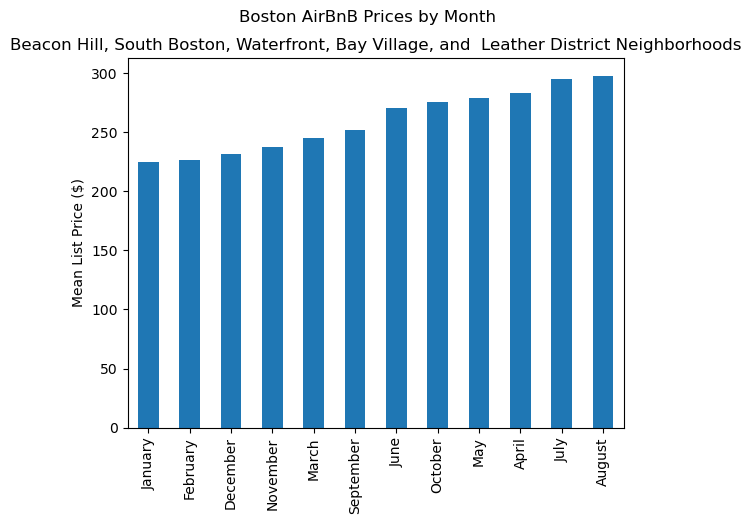

In [474]:
#Let's plot out the average price by month
bh_month = bh_cal.groupby(bh_cal['month'])['price_y'].mean().sort_values()
bh_month.plot(kind ='bar')

plt.suptitle('Boston AirBnB Prices by Month')
plt.title('Beacon Hill, South Boston, Waterfront, Bay Village, and  Leather District Neighborhoods')
plt.xlabel('')
plt.ylabel('Mean List Price ($)')



In [484]:
#convert series to dataframe for easy table identifying average prices and count so there's some context to the numbers
bh_month_prices = bh_month.to_frame()
#pull the count of listings in each neighborhood, so I'm not looking at a small sample
month_cnt = bh_cal['month'].value_counts()
#merge two dataframes to view in one table
month_df = pd.merge(bh_month_prices, month_cnt, how = 'left', on='month')
#format list prices for visual currency, rename columns
month_df = month_df.rename(columns={'price_y':'Avg List Price','count':'# of Listings'})
month_df.index.name = 'Month'
month_df = month_df.style.format({'Avg List Price': "${:,.2f}"})

month_df

,Avg List Price,# of Listings
Month,,
January,$224.85,6014
February,$226.97,5432
December,$232.04,6014
November,$237.73,5820
March,$245.60,6014
September,$252.00,5820
June,$271.09,5820
October,$275.91,6014
May,$278.92,6014
